In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split


import sweetviz as sv

/home/jota/projects/ml-course/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import data

In [2]:
# load iris dataset
iris = datasets.load_iris()

In [3]:
# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Add target column to dataframe
df['class']=iris.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## EDA

In [5]:
report = sv.analyze(df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


In [6]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Decision Tree

In [7]:
from sklearn import tree # Decision tree

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

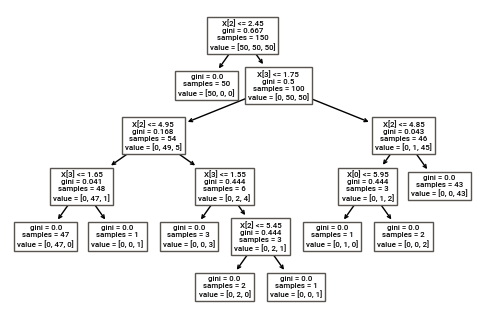

In [8]:
# From documentation

X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

tree.plot_tree(clf)

#### Data split (train and test)

In [9]:
# Define variables 
x = iris.data
y = iris.target

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Train the model

In [11]:
# Train the machine learning model with decision tree
tree_model = tree.DecisionTreeClassifier()

In [12]:
# Train Model with Decision Tree Classifier
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Test model

In [13]:
# Get predictions from model
y_pred = tree_model.predict(X_test)

#### Analyse output

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

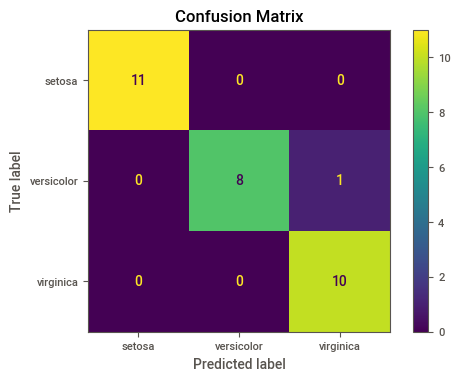

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [15]:
# Generate confusion matrix to analyse
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

#### Model evaluation (manual)

In [16]:
# Plot confusion matrix manual
LABEL = iris.target_names

def matriz(yt, mp):
    conf_matrix = confusion_matrix(yt, mp)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABEL, yticklabels=LABEL, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Real values')
    plt.xlabel('Model values')
    plt.show()
    print(classification_report(yt, mp))

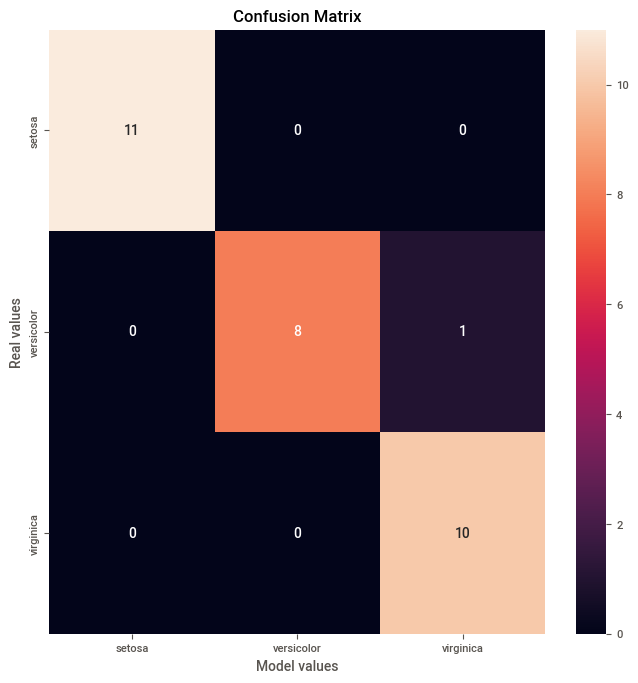

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
matriz(y_test, y_pred)

---
## Under Sampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [19]:
# Get a slide of datset to use under sampling
df_new = df[:130]
df_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
125,7.2,3.2,6.0,1.8,2
126,6.2,2.8,4.8,1.8,2
127,6.1,3.0,4.9,1.8,2
128,6.4,2.8,5.6,2.1,2


<AxesSubplot:title={'center':'Class types'}>

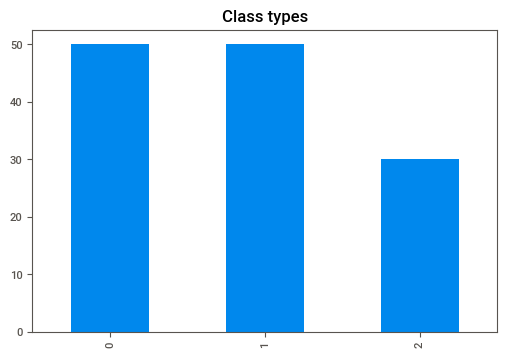

In [20]:
# Plot values to see differences between classes
df_new['class'].value_counts().plot(kind='bar', title='Class types')

In [21]:
df_last = df_new

In [22]:
# Define variables for model
x = df_last.drop(['class'], axis=1)
y = df_last['class']

In [23]:
# Use Random Under Sampling 
rus = RandomUnderSampler(random_state=0)
rus.fit(x, y)

RandomUnderSampler(random_state=0)

In [24]:
# Fit model with resample
x_under, y_under = rus.fit_resample(x, y)

In [25]:
# Analyse undersample
np.unique(y_under, return_counts=True)

(array([0, 1, 2]), array([30, 30, 30]))

In [26]:
# Split dataset with under sampling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(x_under, y_under, test_size=0.2)

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [28]:
# Define variables and split dataset in train and test
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

In [30]:
# Train the model using the training sets
clf = clf.fit(X_train, y_train)

In [31]:
# Use the model
y_pred = clf.predict(X_test)

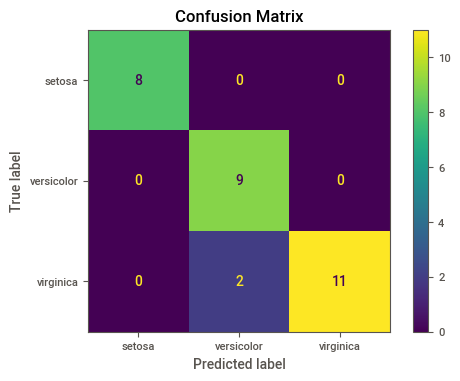

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [32]:
# Create confusion matrix to analyse results
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

### Finding important features

In [33]:
# Get feature importance score for each feature
feature_importances = clf.feature_importances_
feature_importances

array([0.07587906, 0.01660173, 0.42093937, 0.48657984])

Text(0, 0.5, 'Feature')

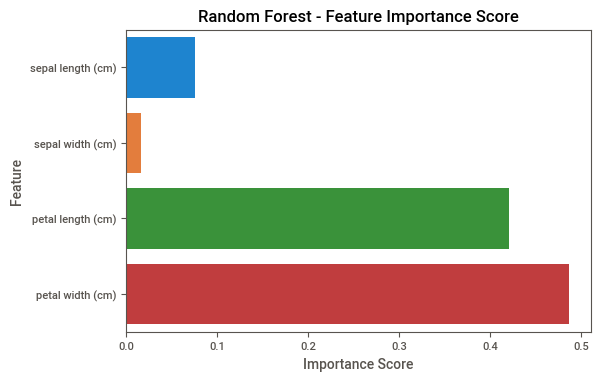

In [34]:
# Creating a bar plot
sns.barplot(x=feature_importances, y=iris.feature_names)
plt.title('Random Forest - Feature Importance Score')
plt.xlabel('Importance Score')
plt.ylabel('Feature')